In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Data description
'''
Data used in this analysis:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

winequality.names:

A README file stating attribution for authors for using the data set along with attributes of the
data set to include one output variable - 'quality.'

winequality-red.csv and winequality-white.csv:

Data sets are described as follows:

4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

'''


"\nData used in this analysis:\n\nP. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. \n  Modeling wine preferences by data mining from physicochemical properties.\n  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.\n\n  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016\n                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf\n                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib\n\nwinequality.names:\n\nA README file stating attribution for authors for using the data set along with attributes of the\ndata set to include one output variable - 'quality.'\n\n"

In [27]:
# Read in the data
red = pd.read_csv('winequality-red.csv', delimiter=';')

In [29]:
# Read in the data
white = pd.read_csv('winequality-white.csv', delimiter=';')

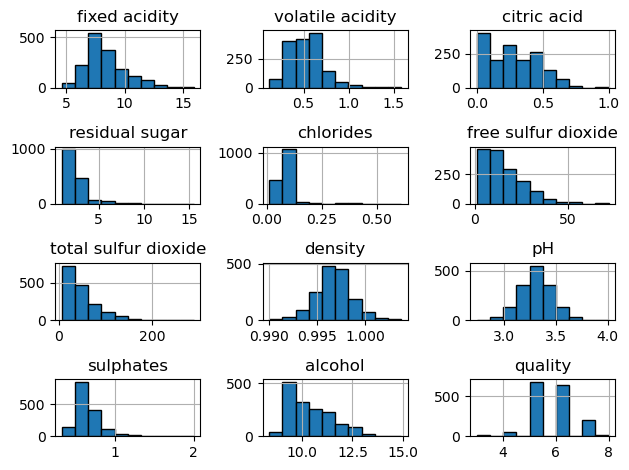

In [59]:
# Frequency distributions
red.hist(edgecolor='black')
plt.tight_layout()

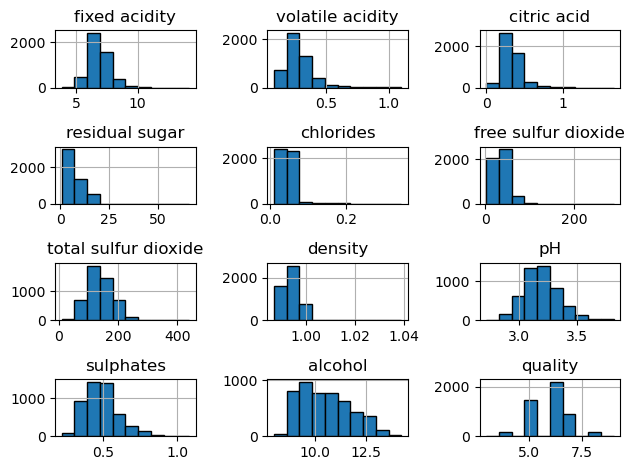

In [61]:
# Frequency distributions
white.hist(edgecolor='black')
plt.tight_layout()

In [63]:
# Perform descriptive stats on red wines
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


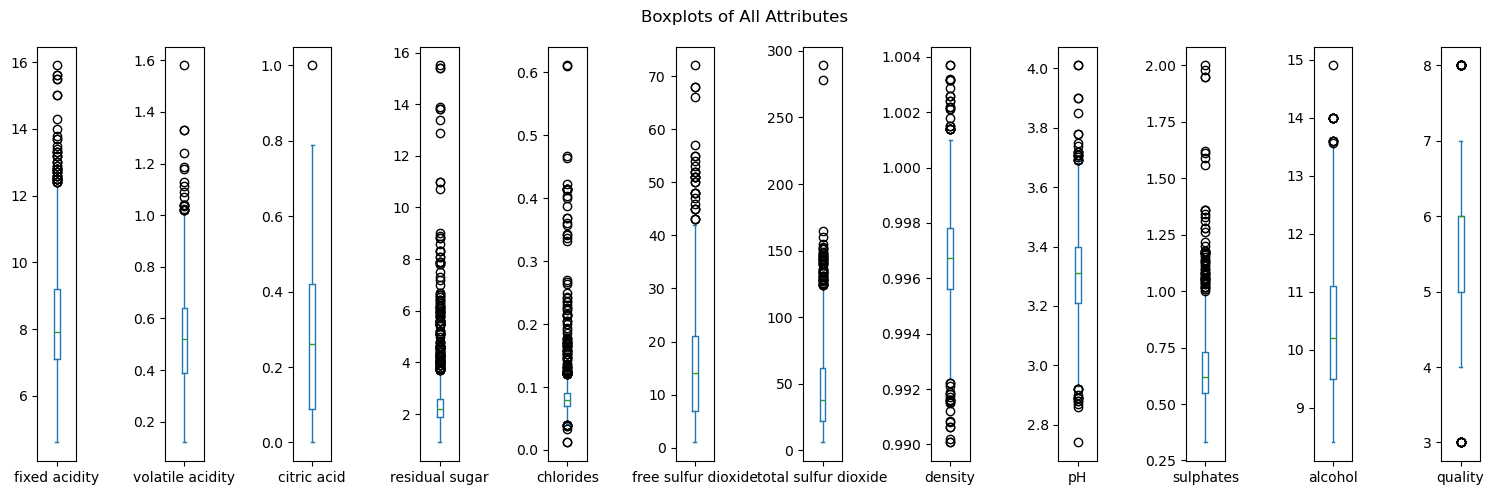

In [91]:
# Boxplots for all attributes of data set - red wines
red.plot(kind='box', subplots=True, layout=(1, len(red.columns)), figsize=(15, 5), title='Boxplots of All Attributes')
plt.tight_layout()
plt.show()

In [65]:
# Perform descriptive stats on white wines
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


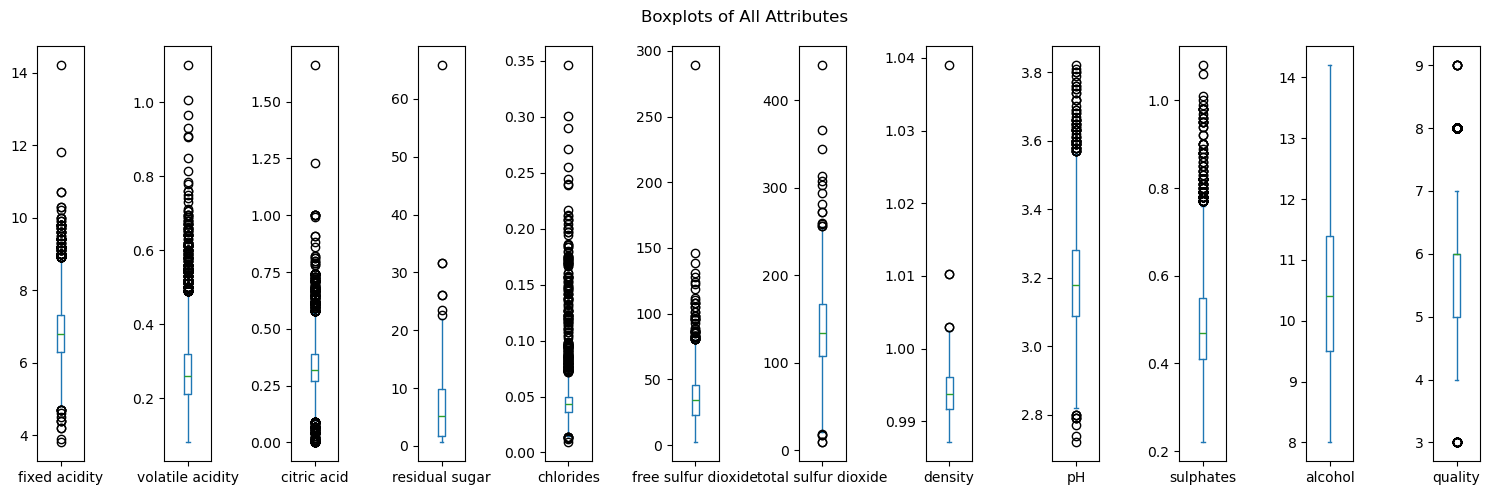

In [93]:
# Boxplots for all attributes of data set - white wines
white.plot(kind='box', subplots=True, layout=(1, len(white.columns)), figsize=(15, 5), title='Boxplots of All Attributes')
plt.tight_layout()
plt.show()

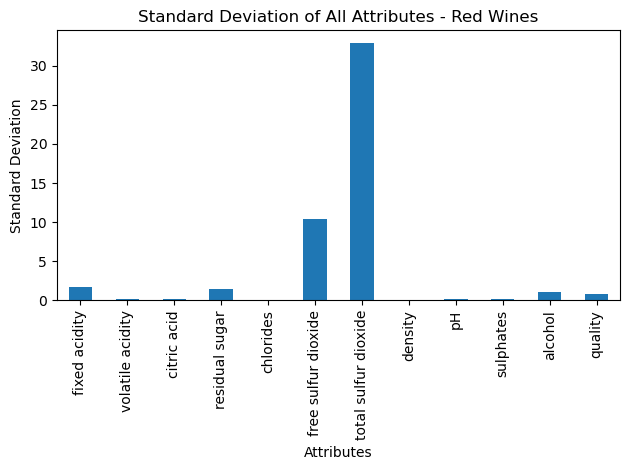

In [85]:
# Perform standard deviation calulations of red wines and plot
std_devs_red = red.std()
std_devs_red.plot(kind='bar', title='Standard Deviation of All Attributes - Red Wines')
plt.xlabel('Attributes')
plt.ylabel('Standard Deviation')
plt.grid(False)
plt.tight_layout()
plt.show()

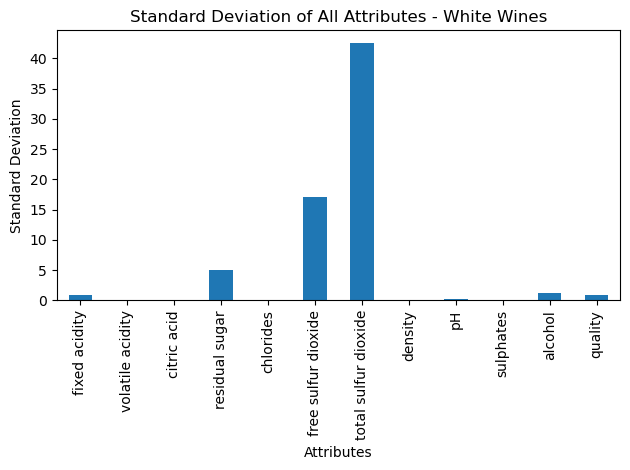

In [83]:
# Perform standard deviation calulations of white wines and plot
std_devs_white = white.std()
std_devs_white.plot(kind='bar', title='Standard Deviation of All Attributes - White Wines')
plt.xlabel('Attributes')
plt.ylabel('Standard Deviation')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# 